<a href="https://colab.research.google.com/github/balamurugan-palaniappan-CEP/AIML_CEP_2021/blob/main/Multi%20Layer%20Perceptron/Multi_class_MNIST_MLP_TA_session_Nov_27.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries
import torch
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

In [ ]:
from torchvision import datasets
import torchvision.transforms as transforms

# how many samples per batch to load
batch_size = 20

# convert data to torch.FloatTensor
transform = transforms.ToTensor()

# choose the training and test datasets
train_data = datasets.MNIST(root='data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False, download=True, transform=transform)

In [ ]:
print(f'Train: X - {train_data.data.shape}, y - {train_data.targets.shape}')
print(f'Test: X - {test_data.data.shape}, y - {test_data.targets.shape}')

Train: X - torch.Size([60000, 28, 28]), y - torch.Size([60000])
Test: X - torch.Size([10000, 28, 28]), y - torch.Size([10000])


In [ ]:
unique, counts = np.unique(train_data.targets, return_counts=True)
print(np.asarray((unique, counts)).T)

[[   0 5923]
 [   1 6742]
 [   2 5958]
 [   3 6131]
 [   4 5842]
 [   5 5421]
 [   6 5918]
 [   7 6265]
 [   8 5851]
 [   9 5949]]


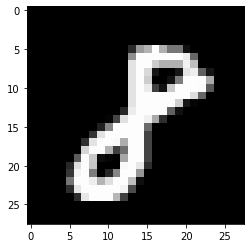



Label in dataset: 8


In [ ]:
plt.imshow(train_data.data[31],cmap='gray')
plt.show()
print(f"\n\nLabel in dataset: {train_data.targets[31]}")

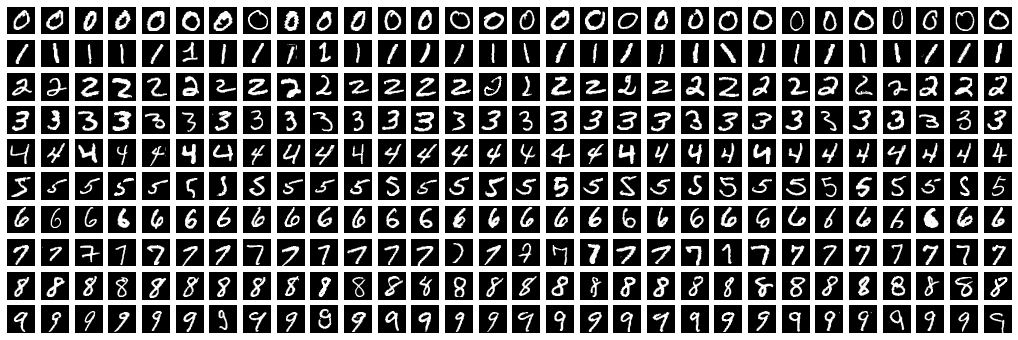

In [ ]:
# Sample images for all digits

digits = np.unique(train_data.targets)
M = 30
dim = 28
fig, axs = plt.subplots(len(digits), M, figsize=(18,6))

for i,d in enumerate(digits):
    for j in range(M):
        axs[i,j].imshow(train_data.data[train_data.targets==d][j].reshape((dim,dim)), cmap='gray')
        axs[i,j].axis('off')

In [ ]:
train_data.data[31]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  42,
         154, 180, 255, 176, 118, 118,  16,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

 Normalization

In [ ]:
train_data.data = np.round(train_data.data/255, 3)
test_data.data = np.round(test_data.data/255, 3)

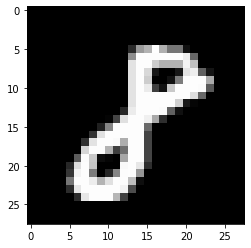

In [ ]:
plt.imshow(train_data.data[31],cmap='gray')
plt.show()

As you can see, normalizing doesn't affect the nature of image. It all depends on the relative values. So now we will use this flattened input layer and proceed for the next step.

##Creating datasets for multi-class Classification:

##Multi-class Classification Problem

In [ ]:
# how many samples per batch to load
batch_size = 20

# convert data to torch.FloatTensor
transform = transforms.ToTensor()

In [ ]:
# prepare data loaders
train_loader_multi = torch.utils.data.DataLoader(train_data, batch_size=batch_size)
test_loader_multi = torch.utils.data.DataLoader(test_data, batch_size=batch_size)

In [ ]:
## Define the NN architecture
import torch.nn as nn

class MLP_multi(nn.Module):
    def __init__(self):
        super(MLP_multi, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        # linear layer (n_hidden -> hidden_2)
        self.fc2 = nn.Linear(512, 512)
        # linear layer (n_hidden -> 1)
        self.fc3 = nn.Linear(512, 10)

    def forward(self, x):
        # flatten image input
        x = x.view(-1, 28 * 28)
        # add hidden layer, with relu activation function
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# initialize the MLP
model_multi = MLP_multi()
print(model_multi)

MLP_multi(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
)


In [ ]:
## Specify loss and optimization functions

# specify loss function
criterion_multi = nn.CrossEntropyLoss()

# specify optimizer
optimizer = torch.optim.SGD(model_multi.parameters(), lr=0.001)

In [ ]:
# number of epochs to train the model
n_epochs = 200

model_multi.train() # prep model for training
errors = np.zeros(n_epochs)
for epoch in range(n_epochs):
    train_loss = 0.0
    # train the model
    for data, target in train_loader_multi:
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model_multi(data)
        # calculate the loss
        loss_multi = criterion_multi(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss_multi.backward()
        # perform the optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss_multi.item()*data.size(0)
        
    # print training statistics 
    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader_multi.dataset)
    errors[epoch] = train_loss
    if (epoch+1)%10 == 0:
      print('Epoch: {} \tTraining Loss: {:.6f}'.format(epoch+1, train_loss))

Epoch: 10 	Training Loss: 1.535787
Epoch: 20 	Training Loss: 1.314300
Epoch: 30 	Training Loss: 1.230824
Epoch: 40 	Training Loss: 1.186216
Epoch: 50 	Training Loss: 1.157335
Epoch: 60 	Training Loss: 1.136538
Epoch: 70 	Training Loss: 1.120440
Epoch: 80 	Training Loss: 1.107456
Epoch: 90 	Training Loss: 1.096572
Epoch: 100 	Training Loss: 1.087157
Epoch: 110 	Training Loss: 1.078736
Epoch: 120 	Training Loss: 1.071065
Epoch: 130 	Training Loss: 1.063967
Epoch: 140 	Training Loss: 1.057304
Epoch: 150 	Training Loss: 1.050948
Epoch: 160 	Training Loss: 1.044794
Epoch: 170 	Training Loss: 1.038774
Epoch: 180 	Training Loss: 1.032898
Epoch: 190 	Training Loss: 1.027080
Epoch: 200 	Training Loss: 1.021313


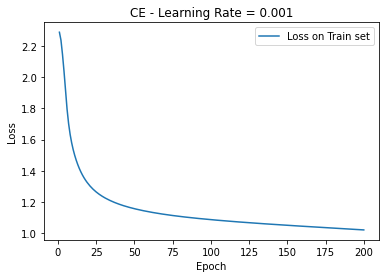

In [ ]:
x = np.arange(1, len(errors)+1)
plt.plot(x, errors, label="Loss on Train set")
plt.legend()
plt.title('CE - Learning Rate = 0.001')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [ ]:
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model_multi.eval() # prep model for *evaluation*

for data, target in test_loader_multi:
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model_multi(data)
    output = output.squeeze()
    # calculate the loss
    loss = criterion_multi(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_loader_multi.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (str(i), 100 * class_correct[i] / class_total[i], np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % str(i))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (100. * np.sum(class_correct) / np.sum(class_total), np.sum(class_correct), np.sum(class_total)))

Test Loss: 1.085588

Test Accuracy of     0: 36% (357/980)
Test Accuracy of     1: 90% (1024/1135)
Test Accuracy of     2: 48% (500/1032)
Test Accuracy of     3: 66% (673/1010)
Test Accuracy of     4: 70% (695/982)
Test Accuracy of     5: 43% (390/892)
Test Accuracy of     6: 89% (859/958)
Test Accuracy of     7: 76% (791/1028)
Test Accuracy of     8: 34% (335/974)
Test Accuracy of     9: 53% (544/1009)

Test Accuracy (Overall): 61% (6168/10000)
